<a href="https://colab.research.google.com/github/ReemAlbluwi/T5/blob/main/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

In [ ]:
df_Task_2= pd.read_csv("/content/drive/MyDrive/Task (2) Dataset.csv")

# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [ ]:
df_Task_2.describe()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
count,66639.000000,66639.000000,66639.000000,66639.000000,66639.000000,62772.000000,62772.000000
mean,14.043113,74.278531,288.353877,49.316135,13.981737,70.706601,70.048451
std,13.488906,107.452022,470.013224,85.352525,13.454922,10.588384,11.966725
min,0.000000,0.000000,0.000000,0.000000,0.000000,49.381346,46.723235
25%,3.000000,9.000000,27.700000,3.000000,3.000000,63.142591,60.712805
50%,10.000000,29.000000,95.700000,12.200000,10.000000,68.894790,68.247303
75%,21.000000,95.000000,336.600000,53.500000,21.000000,76.250975,77.043739
max,138.000000,1359.000000,9989.400000,1173.900000,138.000000,120.140593,134.484139


### Identify and analyze patterns in the data.

In [ ]:

missing_values = df_Task_2.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)








Missing Values in Each Column:
City                      0
Datetime                  0
TrafficIndexLive          0
JamsCount                 0
JamsDelay                 0
JamsLength                0
TrafficIndexWeekAgo       0
TravelTimeHistoric     3867
TravelTimeLive         3867
dtype: int64



Numeric Columns:
Index(['TrafficIndexLive', 'JamsCount', 'JamsDelay', 'JamsLength',
       'TrafficIndexWeekAgo', 'TravelTimeHistoric', 'TravelTimeLive'],
      dtype='object')

Distribution of TrafficIndexLive:
count    66639.000000
mean        14.043113
std         13.488906
min          0.000000
25%          3.000000
50%         10.000000
75%         21.000000
max        138.000000
Name: TrafficIndexLive, dtype: float64


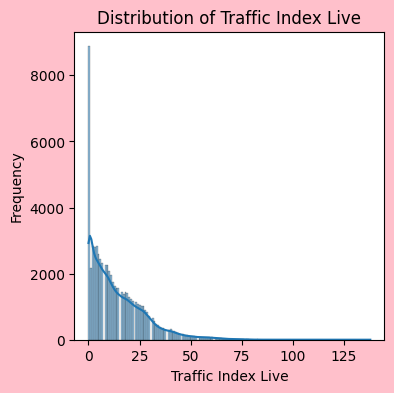

In [ ]:

df_Task_2_numeric = df_Task_2.select_dtypes(include=['number'])
print("\nNumeric Columns:")
print(df_Task_2_numeric.columns)

if 'TrafficIndexLive' in df_Task_2_numeric.columns:
    traffic_index_live_description = df_Task_2_numeric['TrafficIndexLive'].describe()
    print("\nDistribution of TrafficIndexLive:")
    print(traffic_index_live_description)
else:
    print("\nTrafficIndexLive column is not numeric or does not exist.")

#Graphic analysis
plt.figure(figsize=(4, 4), facecolor='pink')
sns.histplot(df_Task_2['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()







Correlation Matrix:
                     TrafficIndexLive  JamsCount  JamsDelay  JamsLength  \
TrafficIndexLive             1.000000   0.876216   0.861349    0.866799   
JamsCount                    0.876216   1.000000   0.982459    0.952762   
JamsDelay                    0.861349   0.982459   1.000000    0.962679   
JamsLength                   0.866799   0.952762   0.962679    1.000000   
TrafficIndexWeekAgo          0.903282   0.806545   0.775028    0.787548   
TravelTimeHistoric           0.331072   0.305166   0.303733    0.306312   
TravelTimeLive               0.642326   0.566874   0.571188    0.569065   

                     TrafficIndexWeekAgo  TravelTimeHistoric  TravelTimeLive  
TrafficIndexLive                0.903282            0.331072        0.642326  
JamsCount                       0.806545            0.305166        0.566874  
JamsDelay                       0.775028            0.303733        0.571188  
JamsLength                      0.787548            0.306312  

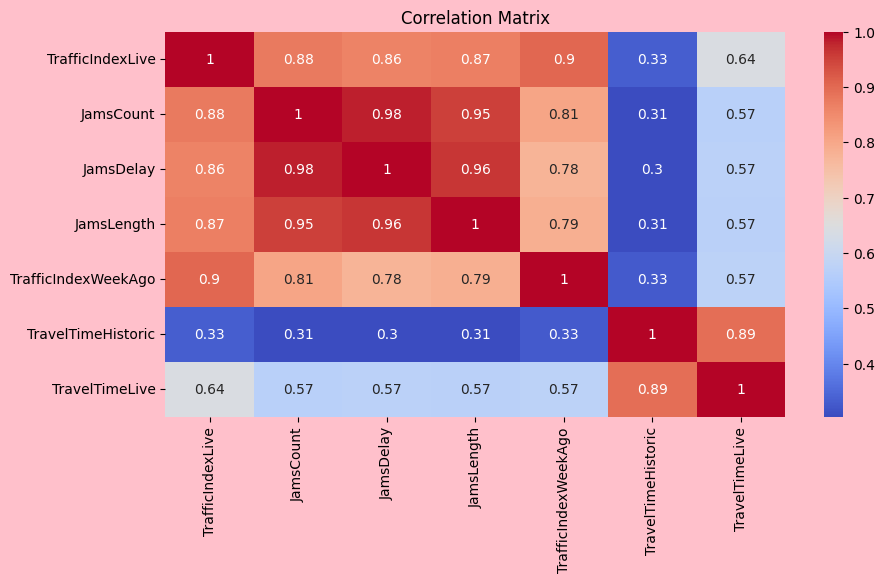

In [ ]:

correlation_matrix = df_Task_2_numeric.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


#Graphic analysis

numeric_df = df_Task_2.select_dtypes(include=['number'])
plt.figure(figsize=(10, 5),facecolor='pink')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




Relationship between JamsCount and JamsDelay:
          JamsCount     JamsDelay
count  66639.000000  66639.000000
mean      74.278531    288.353877
std      107.452022    470.013224
min        0.000000      0.000000
25%        9.000000     27.700000
50%       29.000000     95.700000
75%       95.000000    336.600000
max     1359.000000   9989.400000


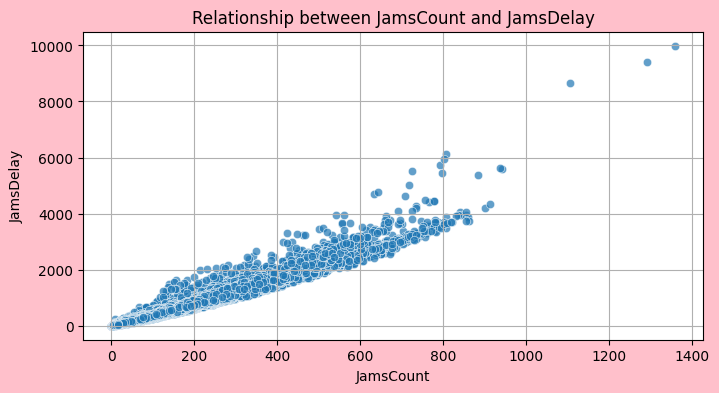

In [ ]:

if 'JamsCount' in df_Task_2_numeric.columns and 'JamsDelay' in df_Task_2_numeric.columns:
    jams_relationship = df_Task_2_numeric[['JamsCount', 'JamsDelay']].describe()
    print("\nRelationship between JamsCount and JamsDelay:")
    print(jams_relationship)
else:
    print("\nJamsCount or JamsDelay column is not numeric or does not exist.")


#Graphic analysis
plt.figure(figsize=(8, 4) , facecolor=('pink'))
sns.scatterplot(data=df_Task_2_numeric, x='JamsCount', y='JamsDelay', alpha=0.7)
plt.title('Relationship between JamsCount and JamsDelay')
plt.xlabel('JamsCount')
plt.ylabel('JamsDelay')
plt.grid(True)
plt.show()


Trend of TrafficIndexLive over Time (Daily Average):
Datetime
2022-12-16    16.283333
2022-12-17    13.516667
2022-12-18    15.900000
2022-12-19    18.433333
2022-12-20    17.341667
Freq: D, Name: TrafficIndexLive, dtype: float64


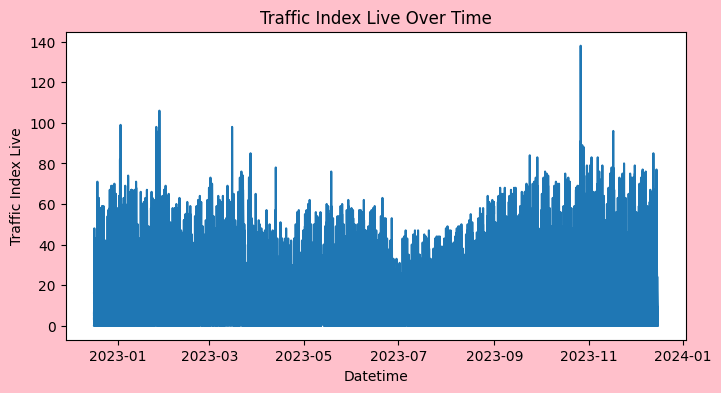

In [ ]:

df_Task_2['Datetime'] = pd.to_datetime(df_Task_2['Datetime'], errors='coerce')
df_Task_2 = df_Task_2.dropna(subset=['Datetime'])
df_Task_2.set_index('Datetime', inplace=True, drop=False)
if 'TrafficIndexLive' in df_Task_2.columns:
    traffic_index_live_trend = df_Task_2['TrafficIndexLive'].resample('D').mean()
    print("\nTrend of TrafficIndexLive over Time (Daily Average):")
    print(traffic_index_live_trend.head())
else:
    print("\nTrafficIndexLive column does not exist.")

#Graphic analysis

plt.figure(figsize=(8, 4), facecolor=('pink'))
plt.plot(df_Task_2['TrafficIndexLive'])
plt.title('Traffic Index Live Over Time')
plt.xlabel('Datetime')
plt.ylabel('Traffic Index Live')
plt.show()



### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

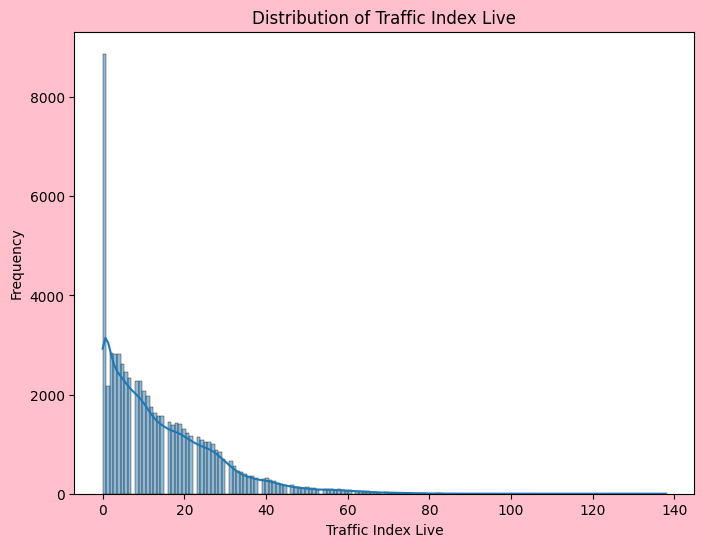

In [ ]:

plt.figure(figsize=(8, 6), facecolor='pink')
sns.histplot(df_Task_2['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()


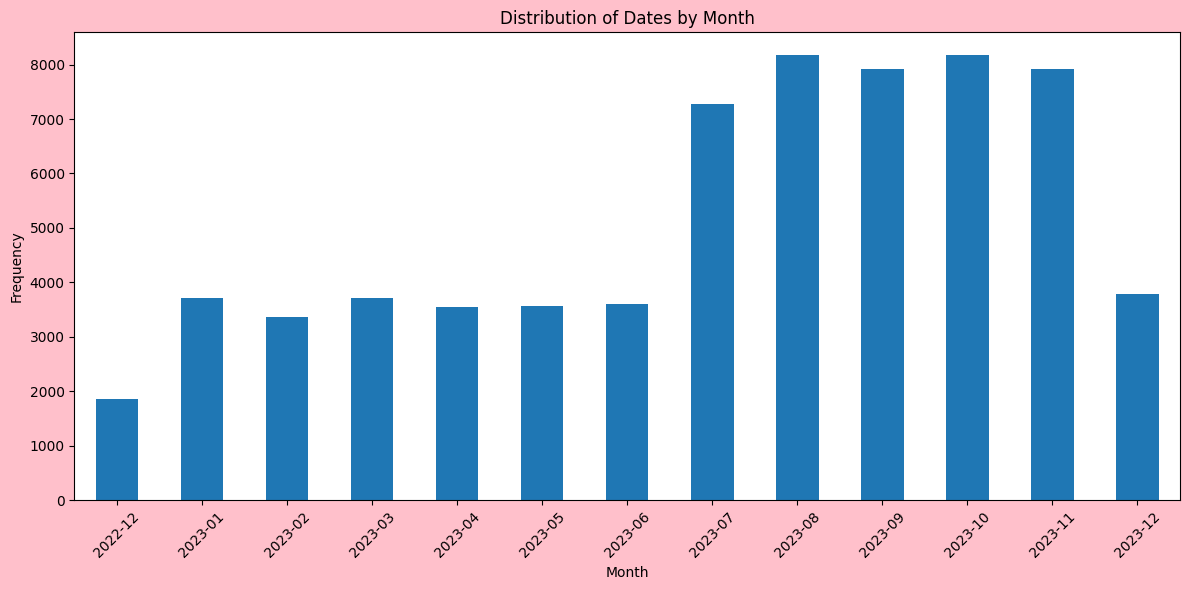

In [ ]:
monthly_counts = df_Task_2['Datetime'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12, 6), facecolor='pink')
monthly_counts.plot(kind='bar')
plt.title('Distribution of Dates by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


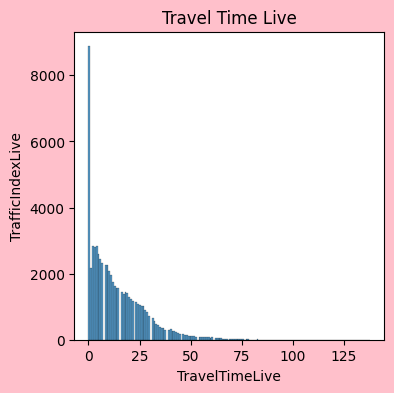

In [ ]:
plt.figure(figsize=(4, 4), facecolor='pink')
sns.histplot(df_Task_2['TrafficIndexLive'])
plt.title('Travel Time Live')
plt.xlabel('TravelTimeLive')
plt.ylabel('TrafficIndexLive')
plt.show()

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


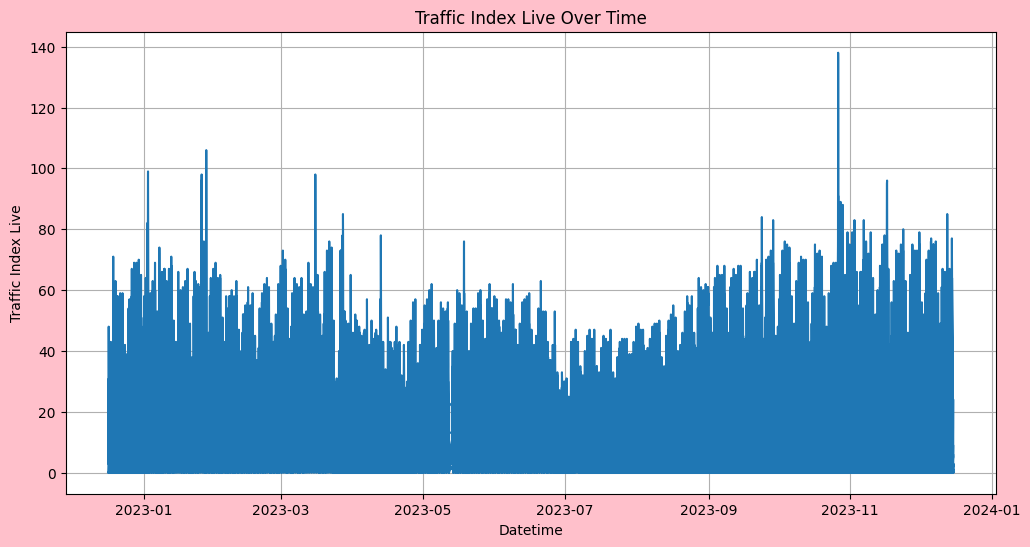

In [ ]:
plt.figure(figsize=(12, 6), facecolor='pink')
plt.plot(df_Task_2.index, df_Task_2['TrafficIndexLive'])
plt.title('Traffic Index Live Over Time')
plt.xlabel('Datetime')
plt.ylabel('Traffic Index Live')
plt.grid(True)
plt.show()




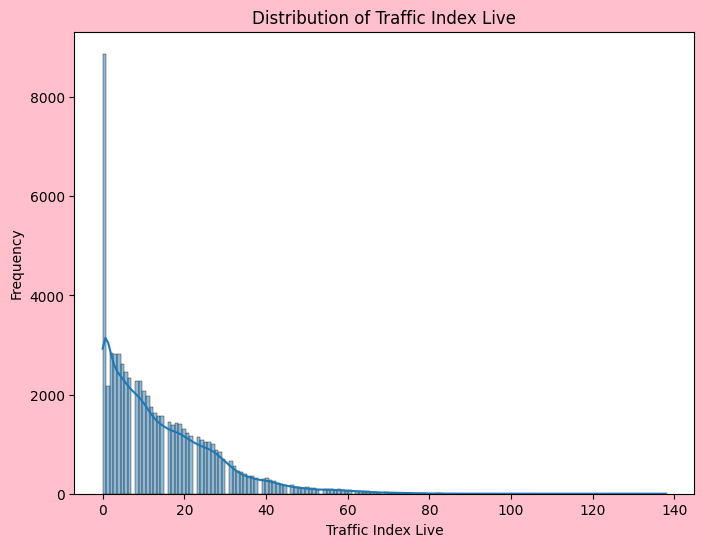

In [ ]:
plt.figure(figsize=(8, 6), facecolor='pink')
sns.histplot(df_Task_2['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()



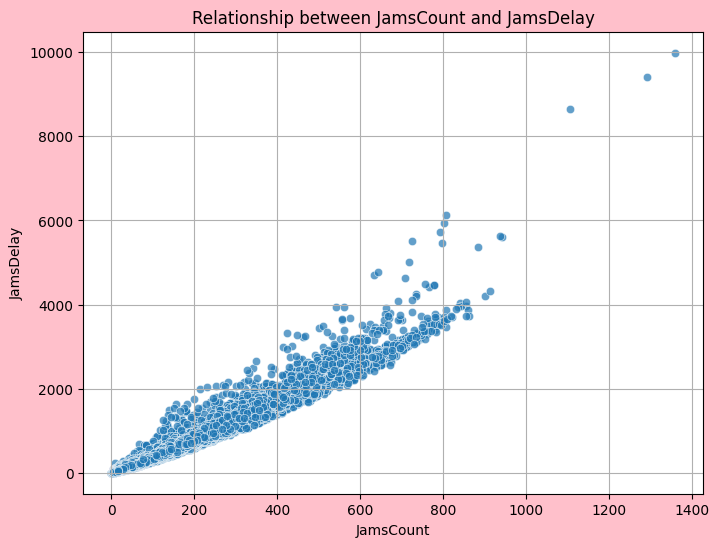

In [ ]:
plt.figure(figsize=(8, 6), facecolor='pink')
sns.scatterplot(data=df_Task_2, x='JamsCount', y='JamsDelay', alpha=0.7)
plt.title('Relationship between JamsCount and JamsDelay')
plt.xlabel('JamsCount')
plt.ylabel('JamsDelay')
plt.grid(True)
plt.show()


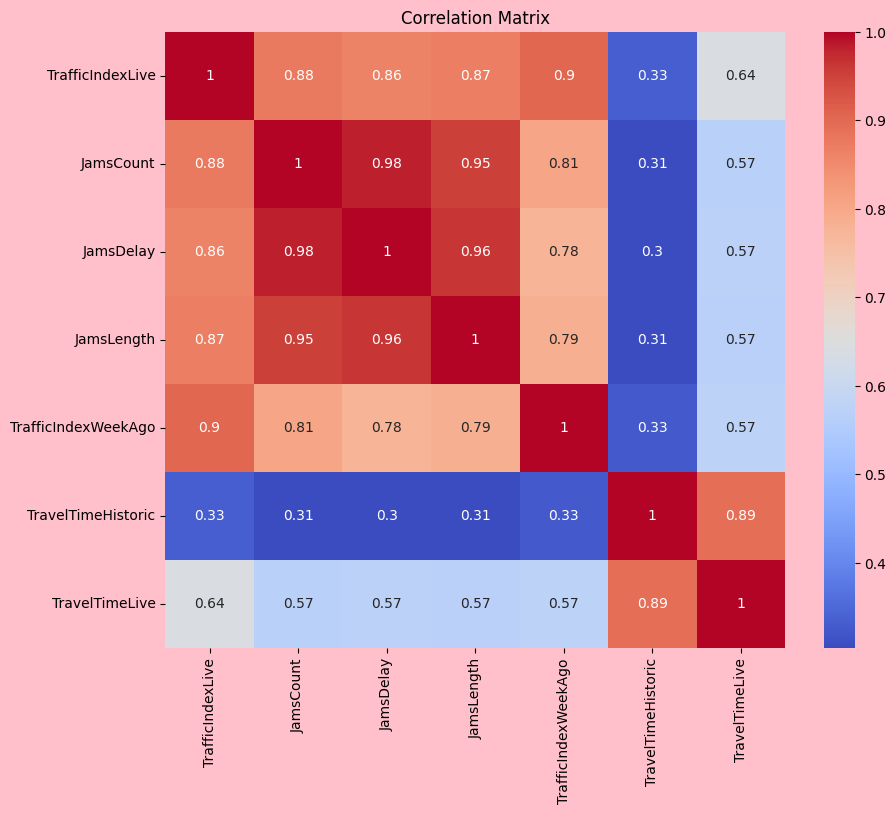

In [ ]:
numeric_df = df_Task_2.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8), facecolor='pink')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



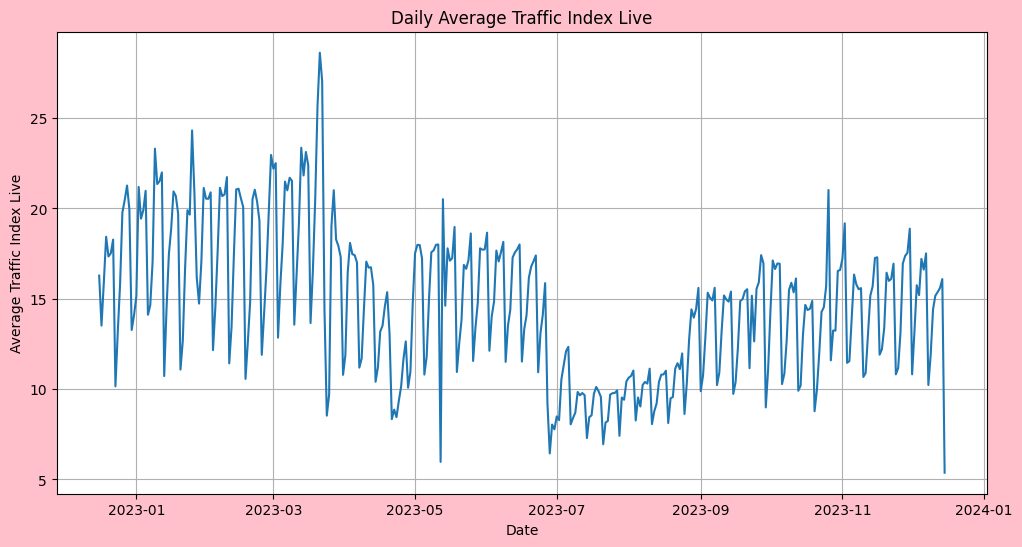

In [ ]:
daily_avg_traffic = df_Task_2['TrafficIndexLive'].resample('D').mean()
plt.figure(figsize=(12, 6), facecolor='pink')
plt.plot(daily_avg_traffic.index, daily_avg_traffic.values)
plt.title('Daily Average Traffic Index Live')
plt.xlabel('Date')
plt.ylabel('Average Traffic Index Live')
plt.grid(True)
plt.show()

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

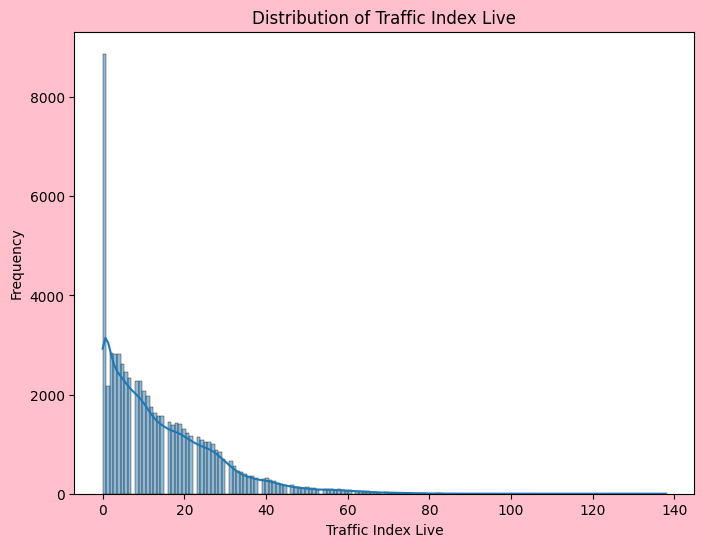

In [ ]:
plt.figure(figsize=(8, 6), facecolor='pink')
sns.histplot(df_Task_2['TrafficIndexLive'], kde=True)
plt.title('Distribution of Traffic Index Live')
plt.xlabel('Traffic Index Live')
plt.ylabel('Frequency')
plt.show()




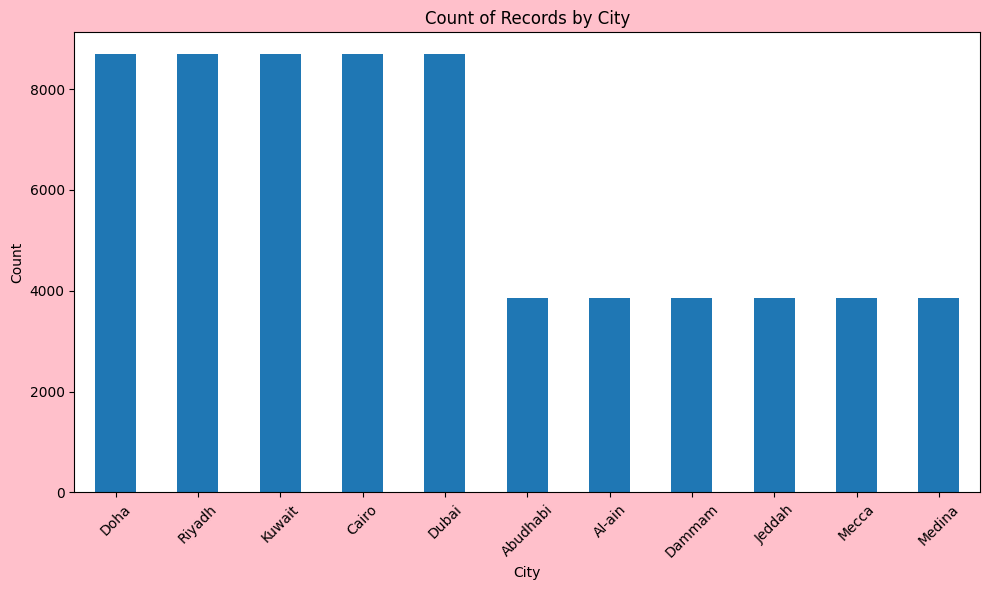

In [ ]:
plt.figure(figsize=(10, 6), facecolor='pink')
df_Task_2['City'].value_counts().plot(kind='bar')
plt.title('Count of Records by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



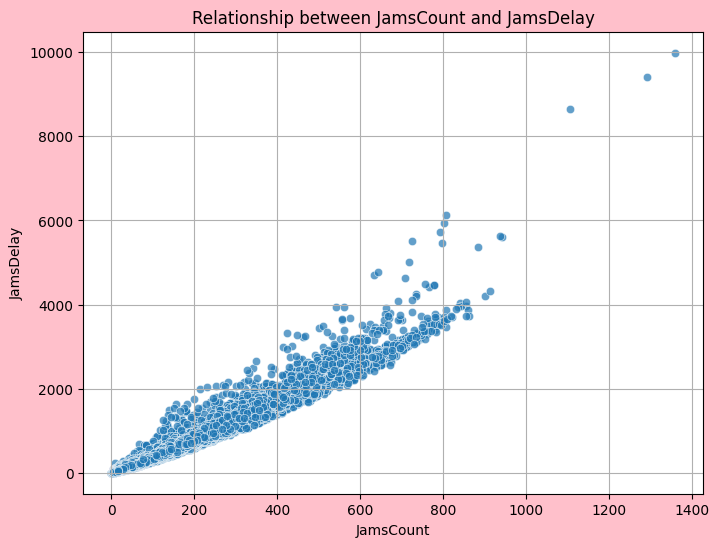

In [ ]:


plt.figure(figsize=(8, 6), facecolor='pink')
sns.scatterplot(data=df_Task_2, x='JamsCount', y='JamsDelay', alpha=0.7)
plt.title('Relationship between JamsCount and JamsDelay')
plt.xlabel('JamsCount')
plt.ylabel('JamsDelay')
plt.grid(True)
plt.show()




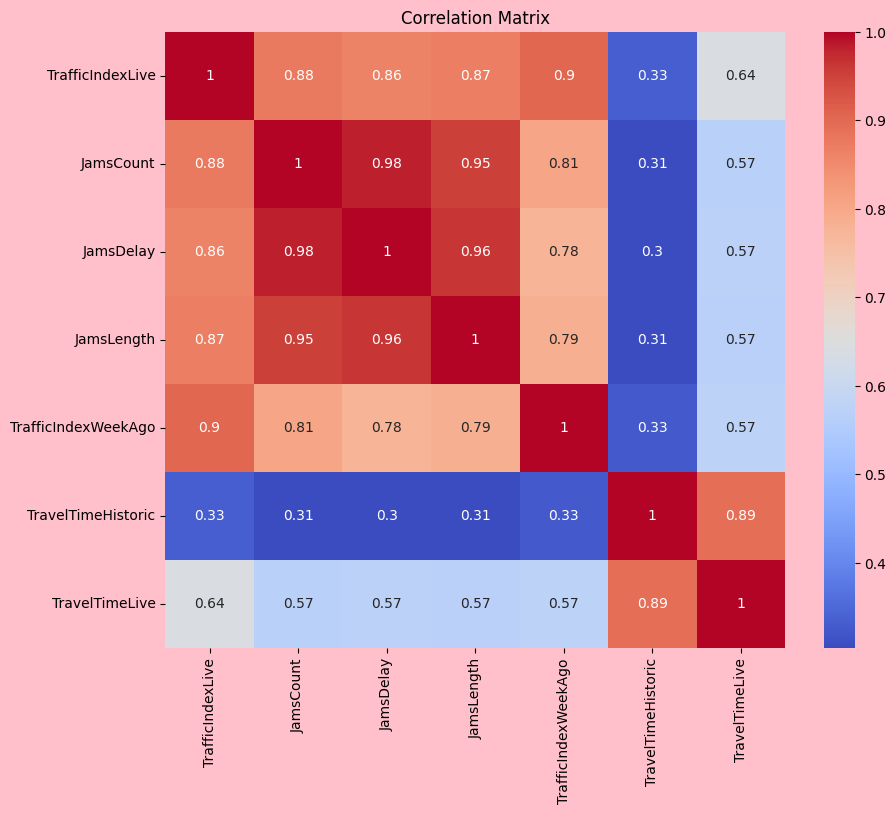

In [ ]:

numeric_df = df_Task_2.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8), facecolor='pink')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>

#Based on the analysis of the data provided by the UAE Diving Federation, the traffic index data were extensive, particularly concerning time and date. Consequently, the data were aggregated and classified by month to clarify the graphical representations.

**Analysis Results:**

**Significant Increase in Traffic Index:**

In November 2023, there was a notable increase in the real-time traffic index. This spike might be associated with specific events or activities during that period, warranting a deeper analysis to identify the underlying causes.

**Traffic Index Distribution:**

The real-time traffic index peaked at approximately 8000. This indicates that there were periods with substantial traffic increases, which could reflect congestion during those times.
**Increase in Daily Average Traffic Index:**

The daily average real-time traffic index saw a rise in March 2023. This increase could be attributed to seasonal changes or specific events in that month, necessitating further analysis to understand the contributing factors.

**Busiest Cities:**

The data identify Doha, Riyadh, Kuwait City, and Dubai as the busiest cities. This highlights the need for improved traffic management and infrastructure development in these cities to handle high traffic volumes.
**Recommendations:**
Analyze the Causes of Increases: Conduct a more detailed analysis to identify the factors contributing to the significant increase observed in November 2023.

**Enhance Traffic Management:** Consider strategies to improve traffic management in the busiest cities such as Doha, Riyadh, Kuwait City, and Dubai.

**Monitor Seasonal Trends:** Analyze seasonal trends and their impact on traffic to better plan and manage traffic flows effectively.